<a href="https://colab.research.google.com/github/ddarcy8/EPA-Toxics-Release-Inventory-2020/blob/main/5_5_22_EPA_Toxics_Release_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This project aims to identify the states, counties, & cities that release the greatest weight of toxics according to 2020 EPA's Toxics Release Inventory
# This project will analyze the release of chemicals identified as carcinogens and chemicals regulated under the Clean Air Act
# The release of all chemicals, as well as the aforementioned subcategory chemicals, will be compared by weight of release across the states while accounting for state population & geographic area

# importing the dataset
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['tri_2020_us capita.csv']))
# Dataset is now stored in a Pandas Dataframe

NameError: ignored

In [ ]:
# Viewing the dataset
df

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,ST Population,ST Area,...,109. 8.2 - ENERGY RECOVER ON,110. 8.3 - ENERGY RECOVER OF,111. 8.4 - RECYCLING ON SITE,112. 8.5 - RECYCLING OFF SIT,113. 8.6 - TREATMENT ON SITE,114. 8.7 - TREATMENT OFF SITE,115. PRODUCTION WSTE (8.1-8.7),116. 8.8 - ONE-TIME RELEASE,117. PROD_RATIO_OR_ ACTIVITY,118. 8.9 - PRODUCTION RATIO
0,2020,9969WDTCHH1577E,1.100000e+11,DELTA WESTERN LLC DUTCH HARBOR BULK FACILITY,1577 EAST POINT ROAD,DUTCH HARBOR,ALEUTIANS WEST CENSUS ARE,AK,733391,665384,...,0.0,0.0,0.0,0.0,0.0,0.0,921.0000,NaN,PRODUCTION,1.10
1,2020,9982WDLTWS118LU,1.100000e+11,DELTA WESTERN LLC HAINES BULK FACILITY,1180 LUTAK RD,HAINES,HAINES BOROUGH,AK,733391,665384,...,0.0,0.0,0.0,0.0,0.0,0.0,7778.0000,NaN,PRODUCTION,0.30
2,2020,99705MPCLS1100H,1.100000e+11,MPC ALASKA TERMINAL CO LLC- NORTH POLE,1100 H&H LN,NORTH POLE,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,...,0.0,1.0,0.0,0.0,0.0,0.0,381.0000,NaN,PRODUCTION,1.19
3,2020,9975WCRWLY943RD,1.100000e+11,CROWLEY KOTZEBUE BULK FUEL FACILITY,940 3RD AVE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,733391,665384,...,0.0,0.0,0.0,0.0,0.0,0.0,15.9000,NaN,PRODUCTION,0.98
4,2020,99703SDPRT1060G,1.100000e+11,FORT WAINWRIGHT MAIN CANTONMENT,FT WAINWRIGHT,FORT WAINWRIGHT,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,...,0.0,0.0,0.0,0.0,0.0,0.0,34164.7000,NaN,ACTIVITY,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76453,2020,83101NGHTN5MISO,1.100000e+11,PACIFICORP NAUGHTON PLANT,HWY 189 S OF KEMMERER,KEMMERER,LINCOLN,WY,576851,97813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,NaN,0.00
76454,2020,82902MNSNTQUEAL,1.100000e+11,P4 PRODUCTION LLC,2.5 MILES S COUNTY RD 50,ROCK SPRINGS,SWEETWATER,WY,576851,97813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.3795,NaN,PRODUCTION,1.09
76455,2020,82701WYMNG740WE,1.100000e+11,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,...,0.0,0.0,0.0,0.0,0.0,0.0,16.9800,NaN,ACTIVITY,1.05
76456,2020,82701WYMNG740WE,1.100000e+11,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,NaN,ACTIVITY,1.00


In [ ]:
# Reviewed https://www.epa.gov/system/files/documents/2021-10/tri-basic-data-file-documentation-ry2020_100721.pdf to identify column definitions
# Creating a new dataframe of only the columns relevant to my analysis based on the column definitions
df2 = df[['4. FACILITY NAME','5. STREET ADDRESS', '6. CITY', '7. COUNTY', '8. ST', 'ST Population', 'ST Area', '9. ZIP', '12. LATITUDE', '13. LONGITUDE', '34. CHEMICAL', '39. CLEAN AIR ACT CHEMICAL', '43. CARCINOGEN', '46. UNIT OF MEASURE', '61. ON-SITE RELEASE TOTAL']]
df2
# This smaller dataset allows me to view all the columns I'm interested in.


,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,ST Population,ST Area,9. ZIP,12. LATITUDE,13. LONGITUDE,34. CHEMICAL,39. CLEAN AIR ACT CHEMICAL,43. CARCINOGEN,46. UNIT OF MEASURE,61. ON-SITE RELEASE TOTAL
0,DELTA WESTERN LLC DUTCH HARBOR BULK FACILITY,1577 EAST POINT ROAD,DUTCH HARBOR,ALEUTIANS WEST CENSUS ARE,AK,733391,665384,99692,53.892130,-166.533010,Benzene,YES,YES,Pounds,921.0000
1,DELTA WESTERN LLC HAINES BULK FACILITY,1180 LUTAK RD,HAINES,HAINES BOROUGH,AK,733391,665384,99827,59.264782,-135.445565,Benzene,YES,YES,Pounds,7778.0000
2,MPC ALASKA TERMINAL CO LLC- NORTH POLE,1100 H&H LN,NORTH POLE,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,99705,64.737264,-147.348440,Xylene (mixed isomers),YES,NO,Pounds,375.0000
3,CROWLEY KOTZEBUE BULK FUEL FACILITY,940 3RD AVE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,733391,665384,99752,66.903354,-162.572224,Cyclohexane,NO,NO,Pounds,15.9000
4,FORT WAINWRIGHT MAIN CANTONMENT,FT WAINWRIGHT,FORT WAINWRIGHT,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,997034500,64.841702,-147.602935,Manganese compounds,YES,NO,Pounds,34164.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76453,PACIFICORP NAUGHTON PLANT,HWY 189 S OF KEMMERER,KEMMERER,LINCOLN,WY,576851,97813,83101,41.757650,-110.596840,Chlorine,YES,NO,Pounds,0.0000
76454,P4 PRODUCTION LLC,2.5 MILES S COUNTY RD 50,ROCK SPRINGS,SWEETWATER,WY,576851,97813,82901,41.524444,-109.220277,Mercury compounds,YES,NO,Pounds,0.0095
76455,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,Ethylene,NO,NO,Pounds,16.9800
76456,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,"1-Propanesulfonic acid, 2-methyl-, 2-[[1-oxo-3...",NO,NO,Pounds,0.0000


In [ ]:
# Checking to see if I have any null values
df2.isnull().sum()
# I have a complete dataset

4. FACILITY NAME              0
5. STREET ADDRESS             0
6. CITY                       0
7. COUNTY                     0
8. ST                         0
ST Population                 0
ST Area                       0
9. ZIP                        0
12. LATITUDE                  0
13. LONGITUDE                 0
34. CHEMICAL                  0
39. CLEAN AIR ACT CHEMICAL    0
43. CARCINOGEN                0
46. UNIT OF MEASURE           0
61. ON-SITE RELEASE TOTAL     0
dtype: int64

In [ ]:
# Looking at the datatypes of the columns
df2.dtypes
# Types of data are object, int64, & float64,

4. FACILITY NAME               object
5. STREET ADDRESS              object
6. CITY                        object
7. COUNTY                      object
8. ST                          object
ST Population                   int64
ST Area                         int64
9. ZIP                          int64
12. LATITUDE                  float64
13. LONGITUDE                 float64
34. CHEMICAL                   object
39. CLEAN AIR ACT CHEMICAL     object
43. CARCINOGEN                 object
46. UNIT OF MEASURE            object
61. ON-SITE RELEASE TOTAL     float64
dtype: object

In [ ]:
# renaming the columns to drop the numbers before column name
df2.rename(columns={'4. FACILITY NAME': 'FACILITY NAME', '5. STREET ADDRESS': 'STREET ADDRESS', '6. CITY': 'CITY', '7. COUNTY': 'COUNTY', '8. ST': 'ST', '9. ZIP': 'ZIP', '5. STREET ADDRESS': 'STREET ADDRESS','12. LATITUDE': 'LATITUDE',  '13. LONGITUDE': 'LONGITUDE', '34. CHEMICAL': 'CHEMICAL', '39. CLEAN AIR ACT CHEMICAL': 'CLEAN AIR ACT CHEMICAL', '43. CARCINOGEN': 'CARCINOGEN', '46. UNIT OF MEASURE': 'UNIT OF MEASURE', '61. ON-SITE RELEASE TOTAL': 'ON-SITE RELEASE TOTAL'}, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ST Population,ST Area,ZIP,LATITUDE,LONGITUDE,CHEMICAL,CLEAN AIR ACT CHEMICAL,CARCINOGEN,UNIT OF MEASURE,ON-SITE RELEASE TOTAL
0,DELTA WESTERN LLC DUTCH HARBOR BULK FACILITY,1577 EAST POINT ROAD,DUTCH HARBOR,ALEUTIANS WEST CENSUS ARE,AK,733391,665384,99692,53.892130,-166.533010,Benzene,YES,YES,Pounds,921.0000
1,DELTA WESTERN LLC HAINES BULK FACILITY,1180 LUTAK RD,HAINES,HAINES BOROUGH,AK,733391,665384,99827,59.264782,-135.445565,Benzene,YES,YES,Pounds,7778.0000
2,MPC ALASKA TERMINAL CO LLC- NORTH POLE,1100 H&H LN,NORTH POLE,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,99705,64.737264,-147.348440,Xylene (mixed isomers),YES,NO,Pounds,375.0000
3,CROWLEY KOTZEBUE BULK FUEL FACILITY,940 3RD AVE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,733391,665384,99752,66.903354,-162.572224,Cyclohexane,NO,NO,Pounds,15.9000
4,FORT WAINWRIGHT MAIN CANTONMENT,FT WAINWRIGHT,FORT WAINWRIGHT,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,997034500,64.841702,-147.602935,Manganese compounds,YES,NO,Pounds,34164.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76453,PACIFICORP NAUGHTON PLANT,HWY 189 S OF KEMMERER,KEMMERER,LINCOLN,WY,576851,97813,83101,41.757650,-110.596840,Chlorine,YES,NO,Pounds,0.0000
76454,P4 PRODUCTION LLC,2.5 MILES S COUNTY RD 50,ROCK SPRINGS,SWEETWATER,WY,576851,97813,82901,41.524444,-109.220277,Mercury compounds,YES,NO,Pounds,0.0095
76455,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,Ethylene,NO,NO,Pounds,16.9800
76456,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,"1-Propanesulfonic acid, 2-methyl-, 2-[[1-oxo-3...",NO,NO,Pounds,0.0000


In [ ]:
# Viewing the statistics of my data
df2.describe()

,ST Population,ST Area,ZIP,LATITUDE,LONGITUDE,ON-SITE RELEASE TOTAL
count,7.645800e+04,76458.000000,7.645800e+04,76458.000000,76458.000000,7.645800e+04
mean,1.154687e+07,86951.952745,7.306686e+06,37.680120,-90.705093,3.523717e+04
std,1.003378e+07,80406.473261,7.129445e+07,5.434079,14.797815,1.613662e+06
min,4.732900e+04,68.000000,6.030000e+02,-14.270919,-170.687692,0.000000e+00
25%,5.024279e+06,44826.000000,3.376500e+04,33.773980,-95.304889,0.000000e+00
50%,7.151502e+06,57914.000000,5.043800e+04,38.679700,-88.067780,1.390000e+01
75%,1.281251e+07,86936.000000,7.465100e+04,41.585661,-82.263900,8.910000e+02
max,3.953822e+07,665384.000000,9.970345e+08,70.233946,145.749933,3.296647e+08


In [ ]:
# So that it is clear what states counties are located in, I'm concatenating columns 'COUNTY' & 'ST' to create a new column called 'County, ST'.
# I'm also converting the data types of columns 'COUNTY' & 'ST' from object to string
df2['COUNTY, ST'] = df2['COUNTY'].astype(str) + ', ' + df2['ST'].astype(str)

# I'm repeating the above step for cities.
df2['CITY, ST'] = df2['CITY'].astype(str) + ', ' + df2['ST'].astype(str)

df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ST Population,ST Area,ZIP,LATITUDE,LONGITUDE,CHEMICAL,CLEAN AIR ACT CHEMICAL,CARCINOGEN,UNIT OF MEASURE,ON-SITE RELEASE TOTAL,"COUNTY, ST","CITY, ST"
0,DELTA WESTERN LLC DUTCH HARBOR BULK FACILITY,1577 EAST POINT ROAD,DUTCH HARBOR,ALEUTIANS WEST CENSUS ARE,AK,733391,665384,99692,53.892130,-166.533010,Benzene,YES,YES,Pounds,921.0000,"ALEUTIANS WEST CENSUS ARE, AK","DUTCH HARBOR, AK"
1,DELTA WESTERN LLC HAINES BULK FACILITY,1180 LUTAK RD,HAINES,HAINES BOROUGH,AK,733391,665384,99827,59.264782,-135.445565,Benzene,YES,YES,Pounds,7778.0000,"HAINES BOROUGH, AK","HAINES, AK"
2,MPC ALASKA TERMINAL CO LLC- NORTH POLE,1100 H&H LN,NORTH POLE,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,99705,64.737264,-147.348440,Xylene (mixed isomers),YES,NO,Pounds,375.0000,"FAIRBANKS NORTH STAR BOROUGH, AK","NORTH POLE, AK"
3,CROWLEY KOTZEBUE BULK FUEL FACILITY,940 3RD AVE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,733391,665384,99752,66.903354,-162.572224,Cyclohexane,NO,NO,Pounds,15.9000,"NORTHWEST ARCTIC BOROUGH, AK","KOTZEBUE, AK"
4,FORT WAINWRIGHT MAIN CANTONMENT,FT WAINWRIGHT,FORT WAINWRIGHT,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,997034500,64.841702,-147.602935,Manganese compounds,YES,NO,Pounds,34164.7000,"FAIRBANKS NORTH STAR BOROUGH, AK","FORT WAINWRIGHT, AK"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76453,PACIFICORP NAUGHTON PLANT,HWY 189 S OF KEMMERER,KEMMERER,LINCOLN,WY,576851,97813,83101,41.757650,-110.596840,Chlorine,YES,NO,Pounds,0.0000,"LINCOLN, WY","KEMMERER, WY"
76454,P4 PRODUCTION LLC,2.5 MILES S COUNTY RD 50,ROCK SPRINGS,SWEETWATER,WY,576851,97813,82901,41.524444,-109.220277,Mercury compounds,YES,NO,Pounds,0.0095,"SWEETWATER, WY","ROCK SPRINGS, WY"
76455,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,Ethylene,NO,NO,Pounds,16.9800,"WESTON, WY","NEWCASTLE, WY"
76456,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,"1-Propanesulfonic acid, 2-methyl-, 2-[[1-oxo-3...",NO,NO,Pounds,0.0000,"WESTON, WY","NEWCASTLE, WY"


Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

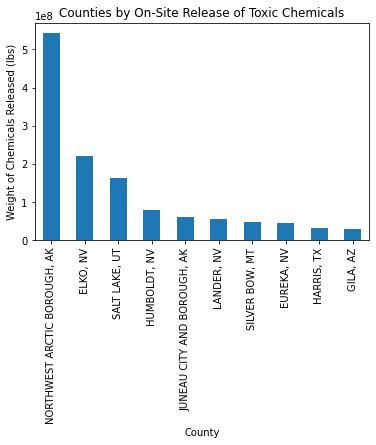

In [ ]:
# Obtaining the ten counties that have the most on-site release totals
df2.groupby(['COUNTY, ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Counties by On-Site Release of Toxic Chemicals")
plt.xlabel("County")
plt.ylabel("Weight of Chemicals Released (lbs)")

# The Northwest Arctic Borough, AK has by far the most toxic releases - over 5 million annual pounds!
# Nevada has 17 counties and 14 of them appear in the top 10 for toxics released, which means 24% of Nevada's counties are in the nation's top 10
# Harris County, TX is the 3rd most populous county in the country & the county with the ninth most toxic released at facilities in the country

Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

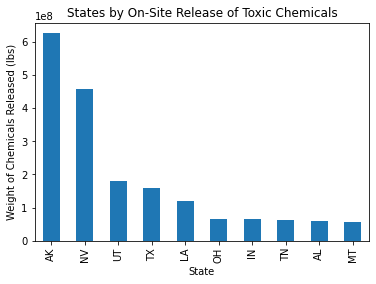

In [ ]:
# Obtaining the ten states that have the most on-site release totals
df2.groupby(['ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by On-Site Release of Toxic Chemicals")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs)")

# Alaska & Nevada produce the most on-site releases in the US by a significant margin
# Most of the states with the most on-site releases are among the lower populated states which means the results per population may signficantly differ

Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

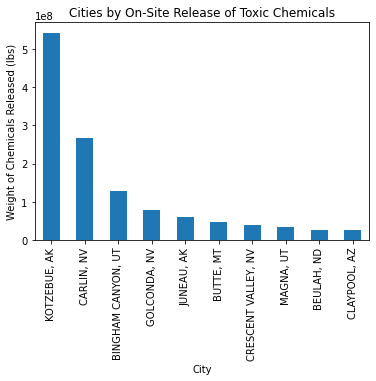

In [ ]:
# Obtaining the ten cities that have the most on-site release totals
df2.groupby(['CITY, ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Cities by On-Site Release of Toxic Chemicals")
plt.xlabel("City")
plt.ylabel("Weight of Chemicals Released (lbs)")

# The cities associated with the highest release levels are mostly in cities I'm unfamiliar with which implies they are lowly populated
# 7 of the 10 counties with the highest levels are in the three states with the highest release levels (AK, NV, & UT)

Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

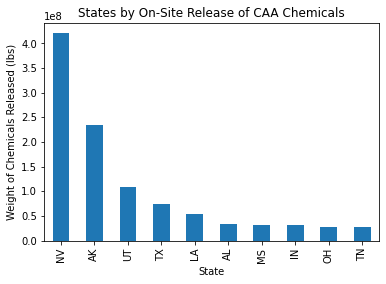

In [ ]:
# Obtaining the ten states that have the most total on-site release of chemicals regulated under the Clean Air Act
df2[df2['CLEAN AIR ACT CHEMICAL'].str.contains('YES')].groupby(['ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by On-Site Release of CAA Chemicals")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs)")

# Comparing states with the highest release level of clean air chemicals with all chemicals finds AK & NV swap places; both still much higher than all other states
# Mississippi, who doesn't even appear in the top 10 for all chemicals, produces the seventh most releases of chemicals regulated under the Clean Air Act

Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

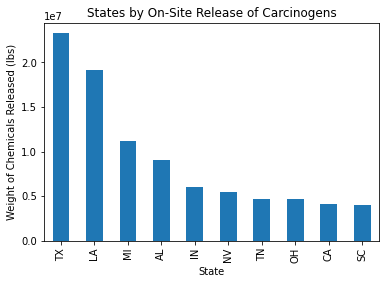

In [ ]:
# Obtaining the ten states that have the most total on-site release of carcinogen chemicals
df2[df2['CARCINOGEN'].str.contains('YES')].groupby(['ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by On-Site Release of Carcinogens")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs)")

# Alaska, which releases the most toxics across all chemicals, completely falls out of the top 10 for carcinogen chemicals
# Texas & Lousiana facilities release significantly more carcinogens than any other state

Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

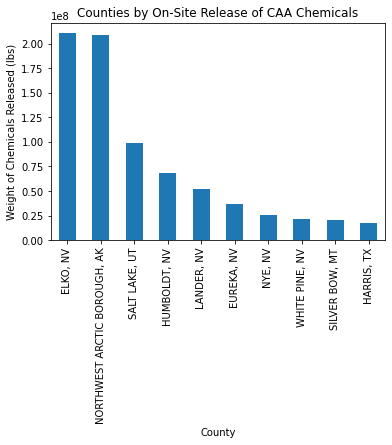

In [ ]:
# Obtaining the ten counties that have the most total on-site release of chemicals regulated under the Clean Air Act
df2[df2['CLEAN AIR ACT CHEMICAL'].str.contains('YES')].groupby(['COUNTY, ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Counties by On-Site Release of CAA Chemicals")
plt.xlabel("County")
plt.ylabel("Weight of Chemicals Released (lbs)")

# The level of Clean Air Act chemicals released in Elko, NV & Northwest Arctic Borough, Ak far exceed the levels in any other county
# Half of the top 10 counties are Nevada counties
# Salt Lake, the 37th most populous county in the country, releases the 3rd most chemicals regulated under the Clean Air Act

Text(0, 0.5, 'Weight of Chemicals Released (lbs)')

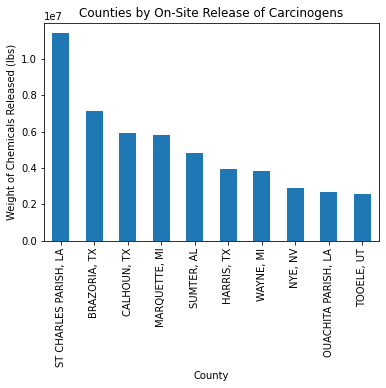

In [ ]:
# Obtaining the ten counties that have the most total on-site release of carcinogen chemicals
df2[df2['CARCINOGEN'].str.contains('YES')].groupby(['COUNTY, ST'])['ON-SITE RELEASE TOTAL'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("Counties by On-Site Release of Carcinogens")
plt.xlabel("County")
plt.ylabel("Weight of Chemicals Released (lbs)")

# St Charles Parish, LA annually releases over 10,000 million pounds of carcinogens, significantly more than all other counties
# Half of the 10 counties that release the most carincogens are in Lousiana or Texas

In [ ]:
# Creating additional columns to account for toxics released per population & area
df2['Release Per ST Population'] = df2['ON-SITE RELEASE TOTAL']/df2['ST Population']
df2['Release Per ST Area'] = df2['ON-SITE RELEASE TOTAL']/df2['ST Area']
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ST Population,ST Area,ZIP,LATITUDE,LONGITUDE,CHEMICAL,CLEAN AIR ACT CHEMICAL,CARCINOGEN,UNIT OF MEASURE,ON-SITE RELEASE TOTAL,"COUNTY, ST","CITY, ST",Release Per ST Population,Release Per ST Area
0,DELTA WESTERN LLC DUTCH HARBOR BULK FACILITY,1577 EAST POINT ROAD,DUTCH HARBOR,ALEUTIANS WEST CENSUS ARE,AK,733391,665384,99692,53.892130,-166.533010,Benzene,YES,YES,Pounds,921.0000,"ALEUTIANS WEST CENSUS ARE, AK","DUTCH HARBOR, AK",1.255810e-03,1.384163e-03
1,DELTA WESTERN LLC HAINES BULK FACILITY,1180 LUTAK RD,HAINES,HAINES BOROUGH,AK,733391,665384,99827,59.264782,-135.445565,Benzene,YES,YES,Pounds,7778.0000,"HAINES BOROUGH, AK","HAINES, AK",1.060553e-02,1.168949e-02
2,MPC ALASKA TERMINAL CO LLC- NORTH POLE,1100 H&H LN,NORTH POLE,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,99705,64.737264,-147.348440,Xylene (mixed isomers),YES,NO,Pounds,375.0000,"FAIRBANKS NORTH STAR BOROUGH, AK","NORTH POLE, AK",5.113234e-04,5.635843e-04
3,CROWLEY KOTZEBUE BULK FUEL FACILITY,940 3RD AVE,KOTZEBUE,NORTHWEST ARCTIC BOROUGH,AK,733391,665384,99752,66.903354,-162.572224,Cyclohexane,NO,NO,Pounds,15.9000,"NORTHWEST ARCTIC BOROUGH, AK","KOTZEBUE, AK",2.168011e-05,2.389598e-05
4,FORT WAINWRIGHT MAIN CANTONMENT,FT WAINWRIGHT,FORT WAINWRIGHT,FAIRBANKS NORTH STAR BOROUGH,AK,733391,665384,997034500,64.841702,-147.602935,Manganese compounds,YES,NO,Pounds,34164.7000,"FAIRBANKS NORTH STAR BOROUGH, AK","FORT WAINWRIGHT, AK",4.658456e-02,5.134584e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76453,PACIFICORP NAUGHTON PLANT,HWY 189 S OF KEMMERER,KEMMERER,LINCOLN,WY,576851,97813,83101,41.757650,-110.596840,Chlorine,YES,NO,Pounds,0.0000,"LINCOLN, WY","KEMMERER, WY",0.000000e+00,0.000000e+00
76454,P4 PRODUCTION LLC,2.5 MILES S COUNTY RD 50,ROCK SPRINGS,SWEETWATER,WY,576851,97813,82901,41.524444,-109.220277,Mercury compounds,YES,NO,Pounds,0.0095,"SWEETWATER, WY","ROCK SPRINGS, WY",1.646872e-08,9.712410e-08
76455,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,Ethylene,NO,NO,Pounds,16.9800,"WESTON, WY","NEWCASTLE, WY",2.943568e-05,1.735966e-04
76456,WYOMING REFINING CO,10 STAMPEDE ST,NEWCASTLE,WESTON,WY,576851,97813,82701,43.851260,-104.214860,"1-Propanesulfonic acid, 2-methyl-, 2-[[1-oxo-3...",NO,NO,Pounds,0.0000,"WESTON, WY","NEWCASTLE, WY",0.000000e+00,0.000000e+00


Text(0, 0.5, 'Weight of Chemicals Released (lbs Per Person)')

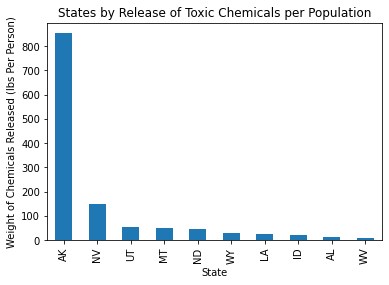

In [ ]:
# Obtaining the ten states that have the most on-site release totals
df2.groupby(['ST'])['Release Per ST Population'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by Release of Toxic Chemicals per Population")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs Per Person)")

# Since Alaska releases the most toxic chemicals and is one of the most least populated states, it release of chemicals per population is off the charts compared to the other states
# Alaska releases over 800 pounds of toxics per person; nearly every other state releases less than 50 pounds
# While the top 3 states for releasing toxics remains the same when accounting for population, only three other states appear in the top 10 of both lists

Text(0, 0.5, 'Weight of Chemicals Released (lbs Per sq mi)')

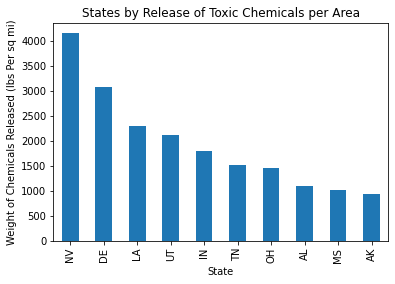

In [ ]:
# Obtaining the ten states that have the most on-site release totals per area
df2.groupby(['ST'])['Release Per ST Area'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by Release of Toxic Chemicals per Area")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs Per sq mi)")

# Nevada releases the most chemicals per square mile, although the differences in the top 10 are more gradual than previous charts.
# 8 of the 10 states that release the most chemicals also release the most toxics per area.

Text(0, 0.5, 'Weight of Chemicals Released (lbs Per Person)')

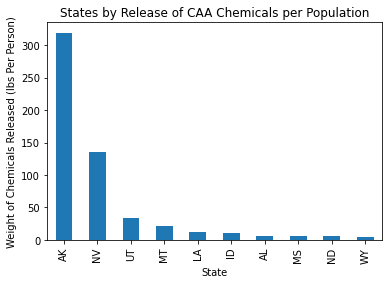

In [ ]:
# Obtaining the ten states per population that have the most total on-site release of chemicals regulated under the Clean Air Act
df2[df2['CLEAN AIR ACT CHEMICAL'].str.contains('YES')].groupby(['ST'])['Release Per ST Population'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by Release of CAA Chemicals per Population")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs Per Person)")

# Alaska releases over 300 pounds per person of chemicals regulated under the Clean Air Act
# This is more than double Nevada, the state that releases the second most.
# 6 of the 10 states that release the most toxics released under the Clean Air Act are among the 10 states with the highest release levels per population

Text(0, 0.5, 'Weight of Chemicals Released (lbs Per sq mi)')

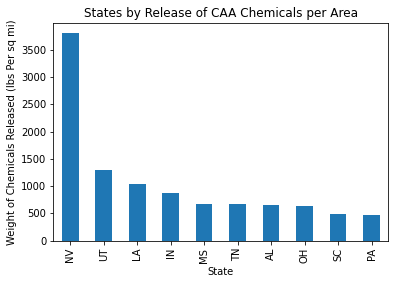

In [ ]:
# Obtaining the ten states that have the most total on-site release of chemicals regulated under the Clean Air Act
df2[df2['CLEAN AIR ACT CHEMICAL'].str.contains('YES')].groupby(['ST'])['Release Per ST Area'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by Release of CAA Chemicals per Area")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs Per sq mi)")

# Nevada releases the most Clean Air Act toxics per area, over 3X more than any other state
# 8 of the 10 states that release the most Clean Air Act toxics are among the 10 states that release the most per area

Text(0, 0.5, 'Weight of Chemicals Released (lbs Per Person)')

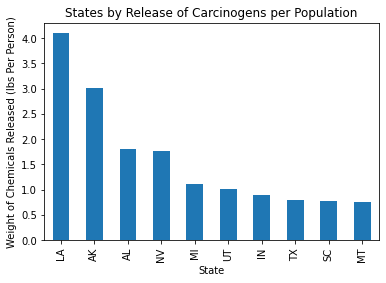

In [ ]:
# Obtaining the ten states that have the most total on-site release of chemicals regulated under the Clean Air Act
df2[df2['CARCINOGEN'].str.contains('YES')].groupby(['ST'])['Release Per ST Population'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by Release of Carcinogens per Population")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs Per Person)")

# The level that carcinogens are released at is significantly lower than the level of Clean Air Act chemicals
# Lousiana & Alaska release the most carcinogens per person, 4 & 3 pounds respectively


Text(0, 0.5, 'Weight of Chemicals Released (lbs Per sq mi)')

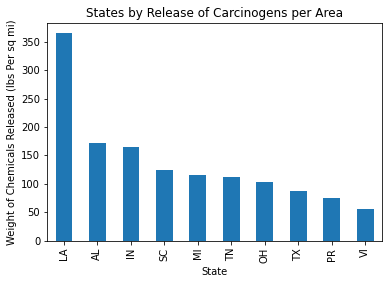

In [ ]:
# Obtaining the ten states that have the most total on-site release of carcinogen chemicals
df2[df2['CARCINOGEN'].str.contains('YES')].groupby(['ST'])['Release Per ST Area'].sum().sort_values(ascending=False)[:10].plot(kind="bar")
plt.title("States by Release of Carcinogens per Area")
plt.xlabel("State")
plt.ylabel("Weight of Chemicals Released (lbs Per sq mi)")

# Lousiana releases the most carcinogens per square mile (over 350 pounds per square mile)
# Alabama & Indiana release the 2nd & 3rd most carcinogens, albeit at a level significantly lower than Lousiana (~170 pounds per square mile)